In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import scipy.stats as stats 
from shapely.geometry import Point
%matplotlib inline

In [4]:
nypd = pd.read_csv('../data/nypd.csv')
nypd['Date'] = pd.to_datetime(nypd['OCCUR_DATE'])
nypd = nypd.drop('OCCUR_DATE', axis=1)

In [5]:
nypd['Month'] = nypd.Date.dt.month 


In [6]:
nypd['Year'] = nypd.Date.dt.year

In [7]:
#dropping string object, need geometry
nypd = nypd.drop('Lon_Lat', axis=1)


In [8]:
#adding geometry objects for mapping
nypd['points'] = nypd.apply(lambda srs: Point( srs['Longitude'] , srs['Latitude']), axis=1)

In [9]:
killed = nypd.loc[nypd.STATISTICAL_MURDER_FLAG == True]

In [10]:
#dividing dataframes into boroughs
bronx = nypd.loc[nypd.BORO == 'BRONX']
brooklyn = nypd.loc[nypd.BORO == 'BROOKLYN']
queens = nypd.loc[nypd.BORO == 'QUEENS']
staten = nypd.loc[nypd.BORO == 'STATEN ISLAND']
manhattan = nypd.loc[nypd.BORO == 'MANHATTAN']

In [11]:
#dividing borough dataframes into 
bx_k = bronx.loc[bronx.STATISTICAL_MURDER_FLAG == True]
brooklyn_k = brooklyn.loc[brooklyn.STATISTICAL_MURDER_FLAG == True]
queens_k = queens.loc[queens.STATISTICAL_MURDER_FLAG == True]
staten_k = staten.loc[staten.STATISTICAL_MURDER_FLAG == True]
manhattan_k = manhattan.loc[manhattan.STATISTICAL_MURDER_FLAG == True]



In [12]:
#assigning total murders by borough
bx_killed, bk_killed, queens_killed, staten_killed, manhattan_killed = bx_k.count()['INCIDENT_KEY'], brooklyn_k.count()['INCIDENT_KEY'], queens_k.count()['INCIDENT_KEY'], staten_k.count()['INCIDENT_KEY'], manhattan_k.count()['INCIDENT_KEY']

In [17]:
geo_k = gpd.GeoDataFrame(killed, geometry = 'points')

In [23]:
#making a geopandas dataframe to plot spatially 
geo_ny = gpd.GeoDataFrame(nypd)
geo_ny = geo_ny.set_geometry('points')

In [24]:
geo_ny

,INCIDENT_KEY,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Date,Month,Year,points
0,201575314,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,...,M,BLACK,1037451,193561,40.697805,-73.808141,2019-08-23,8,2019,POINT (-73.80814 40.69781)
1,205748546,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,...,F,BLACK,1006789,237559,40.818700,-73.918571,2019-11-27,11,2019,POINT (-73.91857 40.81870)
2,193118596,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,...,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,2019-02-02,2,2019,POINT (-73.94548 40.79192)
3,204192600,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,...,F,BLACK,938149,171781,40.638064,-74.166108,2019-10-24,10,2019,POINT (-74.16611 40.63806)
4,201483468,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,...,M,BLACK,1008224,250621,40.854547,-73.913339,2019-08-22,8,2019,POINT (-73.91334 40.85455)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23563,216936948,02:10:00,BRONX,48,0.0,MULTI DWELL - APT BUILD,True,NaN,NaN,NaN,...,M,BLACK HISPANIC,1007277,187698,40.681843,-73.916978,2020-08-21,8,2020,POINT (-73.91698 40.68184)
23564,214926175,23:49:00,QUEENS,102,0.0,HOTEL/MOTEL,False,<18,M,BLACK,...,M,BLACK,1005993,241333,40.829060,-73.921434,2020-07-03,7,2020,POINT (-73.92143 40.82906)
23565,220870730,08:05:00,BROOKLYN,60,0.0,NaN,True,NaN,NaN,NaN,...,M,WHITE,1046405,187113,40.680049,-73.775909,2020-11-21,11,2020,POINT (-73.77591 40.68005)
23566,208187330,01:00:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,...,M,BLACK,1011373,182202,40.666746,-73.902232,2020-01-18,1,2020,POINT (-73.90223 40.66675)


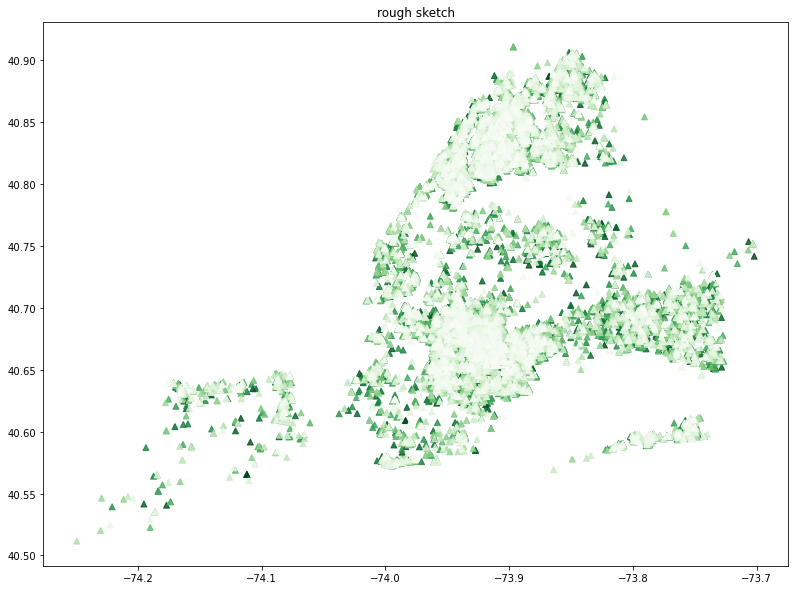

In [25]:
ax = geo_ny.plot(figsize=(15, 10), marker = '^', cmap='Greens_r', alpha=.8)
ax.set_title('rough sketch');


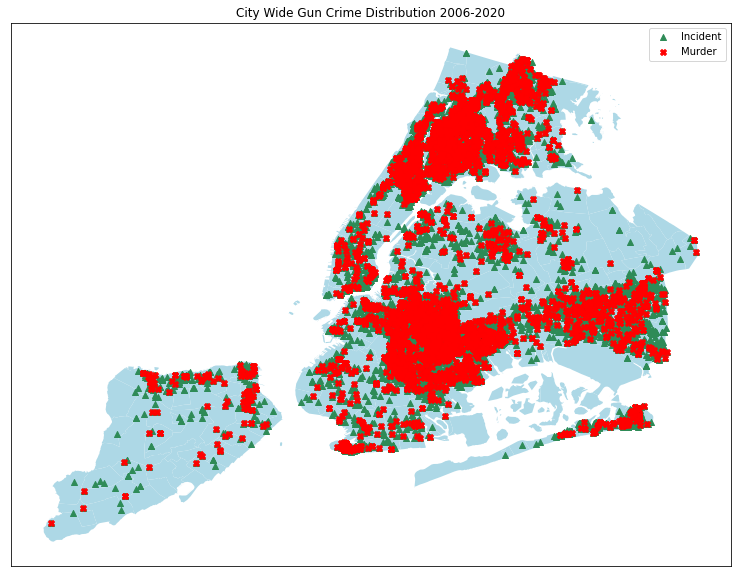

In [26]:
ny_map = gpd.read_file('../data/map.geojson')
fig, ax = plt.subplots(figsize=(15, 10))
ny_map.plot(color = 'lightblue', ax=ax)
geo_ny.plot(marker = '^', color = 'seagreen', ax = ax, label = 'Incident')
geo_k.plot(marker = 'X', color = 'red', ax = ax, label = 'Murder')
ax.set_title('City Wide Gun Crime Distribution 2006-2020')
ax.set_xticks([])
ax.set_yticks([])
ax.legend()
plt.savefig('../images/City-Wide.png');

In [62]:
total_deaths_by_year = []
for name, group in killed.groupby('Year'):
    print(name)
    total_deaths_by_year.append(group.count()['INCIDENT_KEY'])

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [63]:
total_deaths_by_year = np.array(total_deaths_by_year)

In [64]:
total_incidents_by_year = []
for name, group in nypd.groupby('Year'):
    total_incidents_by_year.append(group.count()['INCIDENT_KEY'])
    

In [65]:
total_incidents_by_year = np.array(total_incidents_by_year)

In [66]:
rate_of_murder = total_deaths_by_year / total_incidents_by_year 

In [67]:
rate_of_murder

array([0.21654501, 0.19766826, 0.18488253, 0.19037199, 0.21099476,
       0.1923672 , 0.16715201, 0.1665422 , 0.16939891, 0.19735007,
       0.18460265, 0.17956656, 0.21240799, 0.18924509, 0.18589083])

In [68]:
murder_rate = pd.Series(rate_of_murder, index=range(2006, 2021))

In [73]:
yearly = pd.DataFrame(murder_rate, columns = ['murder_rate'])

In [78]:
yearly['total_deaths'] = total_deaths_by_year
yearly['total_incidents_by_year'] = total_incidents_by_year 

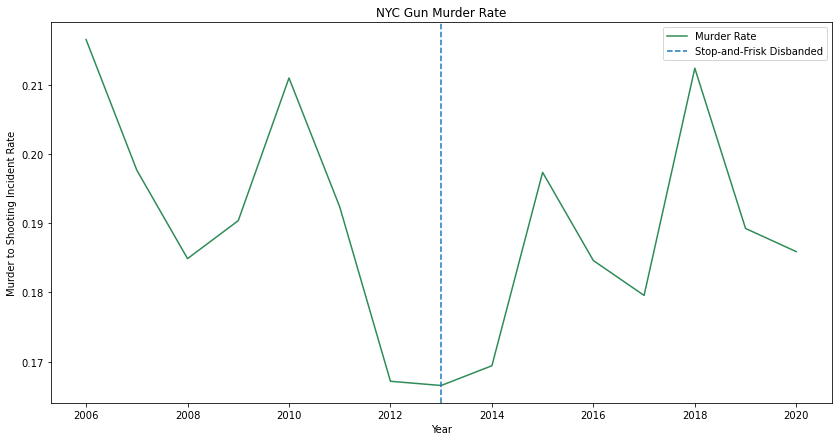

In [91]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(yearly.index, yearly.murder_rate, color='seagreen', label='Murder Rate')
ax.axvline(2013, linestyle = '--', label = 'Stop-and-Frisk Disbanded')
ax.set_title('NYC Gun Murder Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Murder to Shooting Incident Rate')
plt.savefig('../images/Murder-Rate.png')
ax.legend();

In [86]:
def kill_rate(df):
    total_deaths = []
    total_incidents = []
    for name, group in df.groupby('Year'):
        
        

,INCIDENT_KEY,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Date,Month,Year,points
27,199637606,21:45:00,BRONX,46,0.0,NaN,True,18-24,M,UNKNOWN,...,M,WHITE HISPANIC,1012078,252019,40.858373,-73.899402,2019-07-11,7,2019,POINT (-73.89940208399997 40.85837313300004)
70,203041430,01:17:00,BRONX,42,0.0,NaN,True,NaN,NaN,NaN,...,M,BLACK,1012860,244801,40.838559,-73.896606,2019-09-28,9,2019,POINT (-73.89660592299998 40.83855936400005)
124,199325323,01:14:00,BRONX,48,0.0,PVT HOUSE,True,18-24,M,BLACK,...,M,BLACK HISPANIC,1016293,250009,40.852842,-73.884174,2019-07-05,7,2019,POINT (-73.88417430999993 40.85284199500006)
127,205862270,23:01:00,BRONX,46,0.0,NaN,True,18-24,M,BLACK,...,M,BLACK,1005694,247184,40.845120,-73.922496,2019-11-30,11,2019,POINT (-73.92249595899993 40.84512030900004)
131,195553175,14:00:00,BRONX,42,0.0,NaN,True,25-44,M,BLACK,...,M,BLACK,1011134,241668,40.829966,-73.902856,2019-04-03,4,2019,POINT (-73.90285617699993 40.82996560900006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23453,220002827,01:40:00,BRONX,49,0.0,NaN,True,NaN,NaN,NaN,...,M,BLACK,1005623,248047,40.847489,-73.922750,2020-11-01,11,2020,POINT (-73.92274982499998 40.84748916200004)
23476,213858244,00:07:00,BRONX,48,0.0,NaN,True,18-24,M,BLACK,...,M,BLACK,1016598,249443,40.851287,-73.883075,2020-06-05,6,2020,POINT (-73.883074546 40.85128738100008)
23529,217776903,09:16:00,BRONX,43,0.0,NaN,True,25-44,M,WHITE HISPANIC,...,M,WHITE HISPANIC,995996,183938,40.671544,-73.957658,2020-09-13,9,2020,POINT (-73.95765812199994 40.67154448400004)
23530,216360027,21:00:00,BRONX,42,0.0,NaN,True,18-24,M,BLACK,...,M,BLACK,1008739,239004,40.822661,-73.911520,2020-08-08,8,2020,POINT (-73.91152022199999 40.82266065500005)
